In [1]:
import os, sys
import datetime
from datetime import datetime, date, timedelta
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas.plotting import scatter_matrix
import mglearn
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
%config InlineBackend.figure_format = 'svg'
from mpl_toolkits.mplot3d import Axes3D, axes3d
from scipy import sparse
import scipy.stats as ss
import scipy.cluster.hierarchy as sch
import pingouin as pg
import spacy, nltk
from konlpy.tag import Okt

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import make_blobs, make_moons
from sklearn.datasets import make_circles
from sklearn.datasets import load_iris

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression, SGDClassifier, SGDRegressor, ElasticNet
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, AdaBoostClassifier, AdaBoostRegressor
from sklearn.svm import SVC, SVR
from sklearn.neural_network import MLPClassifier, MLPRegressor

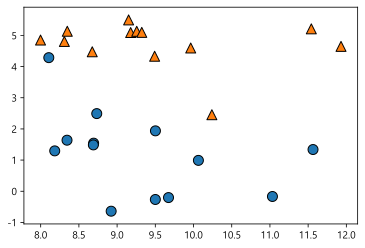

In [4]:
X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

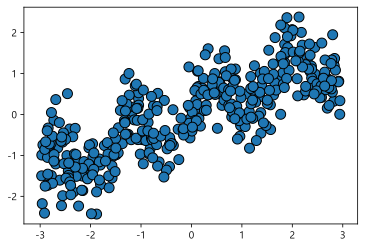

In [5]:
X, y = mglearn.datasets.make_wave(n_samples=400)
mglearn.discrete_scatter(X, y)

In [6]:
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
cancer['data'].shape, cancer['target'].shape

((569, 30), (569,))

In [8]:
{n: v for n, v in zip(cancer['target_names'], np.bincount(cancer['target']))}

{'malignant': 212, 'benign': 357}

In [9]:
X, y = mglearn.datasets.load_extended_boston()
X.shape

(506, 104)

In [10]:
boston = mglearn.datasets.load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

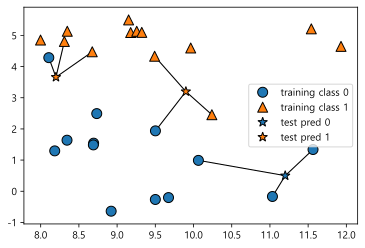

In [11]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [12]:
X, y = mglearn.datasets.make_forge()

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [14]:
knn = KNeighborsClassifier(n_neighbors=3, metric='cityblock').fit(X_train, y_train)
knn.score(X_train, y_train), knn.score(X_test, y_test)

(0.9473684210526315, 0.8571428571428571)

In [15]:
knn.predict(X_test)

array([1, 0, 1, 0, 1, 0, 0])

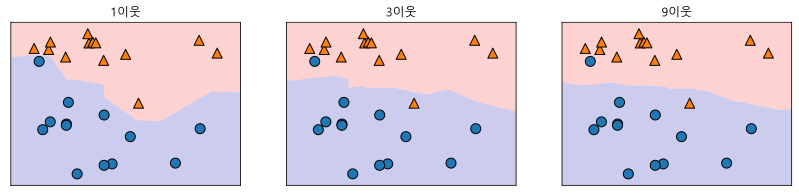

In [16]:
fig, axs = plt.subplots(1, 3, figsize=(14, 3))
for n_nei, ax in zip([1, 3, 9], axs.ravel()):
    knn = KNeighborsClassifier(n_neighbors=n_nei).fit(X, y)
    mglearn.plots.plot_2d_separator(knn, X, fill=True, eps=0.5, alpha=0.2, ax=ax)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(f'{n_nei}이웃')

In [17]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], stratify=cancer['target'], random_state=66)

In [18]:
train_acc = []
test_acc = []
nei_settings = range(1, 31, 2)
for n_nei in nei_settings:
    knn = KNeighborsClassifier(n_neighbors=n_nei).fit(X_train, y_train)
    train_acc.append(knn.score(X_train, y_train))
    test_acc.append(knn.score(X_test, y_test))

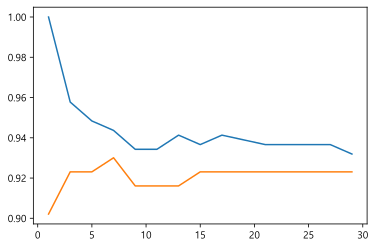

In [19]:
plt.plot(nei_settings, train_acc, label='train')
plt.plot(nei_settings, test_acc, label='test')

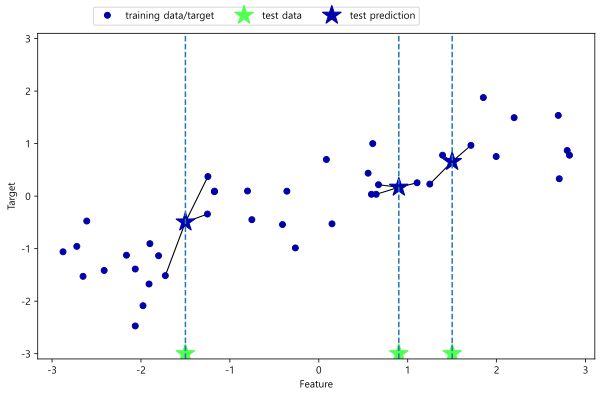

In [20]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [21]:
X, y = mglearn.datasets.make_wave(n_samples=200)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [22]:
knn = KNeighborsRegressor(n_neighbors=5).fit(X_train, y_train)
knn.score(X_train, y_train), knn.score(X_test, y_test)

(0.7907506103901912, 0.7611479090955788)

In [23]:
X, y = mglearn.datasets.make_wave(n_samples=200)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [24]:
lr = LinearRegression().fit(X_train, y_train)
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.6335981977103506, 0.7467727639987141)

In [25]:
lr.coef_, lr.intercept_

(array([0.42628067]), 0.08052836281927592)

In [26]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [27]:
lr = LinearRegression().fit(X_train, y_train)
lr.score(X_train, y_train), lr.score(X_test, y_test), lr.coef_, lr.intercept_

(0.9520519609032728,
 0.6074721959665788,
 array([-4.12710947e+02, -5.22432068e+01, -1.31898815e+02, -1.20041365e+01,
        -1.55107129e+01,  2.87163342e+01,  5.47040992e+01, -4.95346659e+01,
         2.65823927e+01,  3.70620316e+01, -1.18281674e+01, -1.80581965e+01,
        -1.95246830e+01,  1.22025403e+01,  2.98078144e+03,  1.50084257e+03,
         1.14187325e+02, -1.69700520e+01,  4.09613691e+01, -2.42636646e+01,
         5.76157466e+01,  1.27812142e+03, -2.23986944e+03,  2.22825472e+02,
        -2.18201083e+00,  4.29960320e+01, -1.33981515e+01, -1.93893485e+01,
        -2.57541277e+00, -8.10130128e+01,  9.66019367e+00,  4.91423718e+00,
        -8.12114800e-01, -7.64694179e+00,  3.37837099e+01, -1.14464390e+01,
         6.85083979e+01, -1.73753604e+01,  4.28128204e+01,  1.13988209e+00,
        -7.72696840e-01,  5.68255921e+01,  1.42875996e+01,  5.39551110e+01,
        -3.21709644e+01,  1.92709675e+01, -1.38852338e+01,  6.06343266e+01,
        -1.23153942e+01, -1.20041365e+01, -1.7

In [28]:
ridge = Ridge(alpha=0.1, solver='saga').fit(X_train, y_train)
ridge.score(X_train, y_train), ridge.score(X_test, y_test)

(0.9277236352394961, 0.772739874026272)

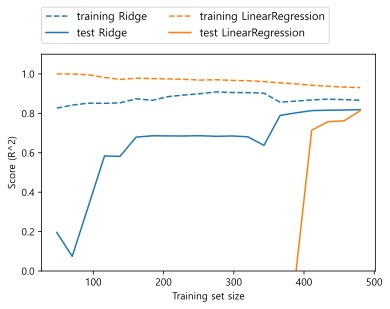

In [29]:
mglearn.plots.plot_ridge_n_samples()

In [30]:
lasso = Lasso(alpha=0.005, max_iter=10000).fit(X_train, y_train)
lasso.score(X_train, y_train), lasso.score(X_test, y_test)

(0.9159618987334425, 0.7813535143177984)

In [31]:
np.sum(lasso.coef_ != 0)

43

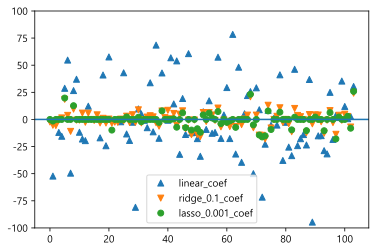

In [32]:
plt.plot(lr.coef_, '^', label='linear_coef')
plt.plot(ridge.coef_, 'v', label='ridge_0.1_coef')
plt.plot(lasso.coef_, 'o', label='lasso_0.001_coef')
plt.ylim(-100, 100)
plt.axhline()
plt.legend()

In [33]:
ela = ElasticNet(alpha=0.001, l1_ratio=0.7, max_iter=10000).fit(X_train, y_train)
ela.score(X_train, y_train), ela.score(X_test, y_test)

(0.9238124577236176, 0.7761672849803961)

In [34]:
X, y = mglearn.datasets.make_forge()

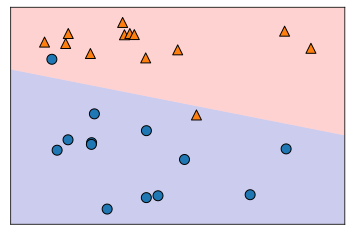

In [35]:
mglearn.plots.plot_2d_separator(LogisticRegression().fit(X, y), X, fill=True, eps=0.5, alpha=0.2)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [36]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], stratify=cancer['target'], random_state=42)

In [37]:
logreg = LogisticRegression(C=100, max_iter=5000).fit(X_train, y_train)
logreg.score(X_train, y_train), logreg.score(X_test, y_test)

(0.9812206572769953, 0.965034965034965)

In [38]:
logreg = LogisticRegression(C=100, max_iter=5000, penalty='l1', solver='liblinear').fit(X_train, y_train)
logreg.score(X_train, y_train), logreg.score(X_test, y_test)

(0.9859154929577465, 0.9790209790209791)

In [39]:
logreg.coef_

array([[ 8.89983188e-01, -1.93094954e-01,  1.09479263e-01,
        -4.89147020e-03, -1.18878574e+01,  6.58596497e+01,
        -5.34234823e+00, -8.70477608e+01,  0.00000000e+00,
         0.00000000e+00, -1.03015663e+00,  7.27949075e-01,
         9.51388448e-01, -2.44878832e-01,  0.00000000e+00,
         0.00000000e+00,  3.64223573e+01,  0.00000000e+00,
         3.54735582e+01,  0.00000000e+00,  3.40849919e-01,
        -3.03775327e-01,  4.19319701e-02, -2.33186751e-02,
        -5.05379608e+01,  2.53827021e-01, -1.05014433e+01,
        -4.51100982e+01, -1.96427348e+01,  0.00000000e+00]])

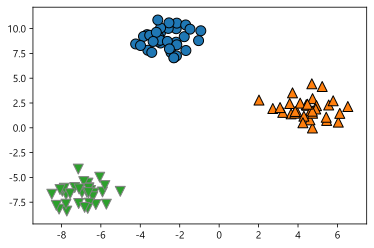

In [40]:
X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [41]:
np.logspace(-3, 2, 6)

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])

In [42]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [43]:
sgd = SGDRegressor(loss='huber', alpha=0.00001, eta0=0.1, learning_rate='adaptive', random_state=0).fit(X_train, y_train)
sgd.score(X_train, y_train), sgd.score(X_test, y_test)

(0.7659236750292319, 0.5818275498584353)

In [44]:
X_train.shape

(379, 104)

In [45]:
sgd = SGDRegressor(eta0=0.1, learning_rate='adaptive', random_state=0).fit(X_train, y_train)
sgd.score(X_train, y_train), sgd.score(X_test, y_test)

(0.9147006914185295, 0.7812857942566063)

In [46]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], stratify=cancer['target'], random_state=42)

In [47]:
nb = BernoulliNB(alpha=10).fit(X_train, y_train)
nb.score(X_train, y_train), nb.score(X_test, y_test)

(0.6267605633802817, 0.6293706293706294)

In [48]:
nb.class_count_, nb.class_log_prior_

(array([159., 267.]), array([-0.98553514, -0.46719069]))

In [49]:
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, 'ram_price.csv'), index_col=0)
ram_prices.head()

,date,price
0,1957.0,411041792.0
1,1959.0,67947725.0
2,1960.0,5242880.0
3,1965.0,2642412.0
4,1970.0,734003.0


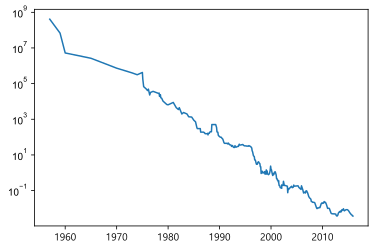

In [50]:
plt.yticks(fontname='Arial')
plt.semilogy(ram_prices['date'], ram_prices['price'])
plt.show()

In [51]:
data_train = ram_prices[ram_prices['date'] < 2000]
data_test = ram_prices[ram_prices['date'] >= 2000]

In [52]:
X_train = data_train[['date']]
y_train = data_train['price'].apply(lambda ser: np.log(ser))

In [53]:
tree = DecisionTreeRegressor().fit(X_train, y_train)
lr = LinearRegression().fit(X_train, y_train)

c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

In [54]:
X_all = ram_prices[['date']]
X_all

,date
0,1957.00
1,1959.00
2,1960.00
3,1965.00
4,1970.00
...,...
328,2015.58
329,2015.67
330,2015.75
331,2015.83


In [55]:
pred_tree = tree.predict(X_all)
pred_lr = lr.predict(X_all)
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


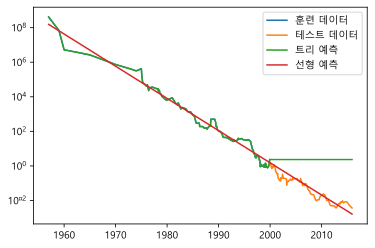

In [56]:
plt.semilogy(data_train['date'], data_train['price'], label='훈련 데이터')
plt.semilogy(data_test['date'], data_test['price'], label='테스트 데이터')
plt.semilogy(ram_prices['date'], price_tree, label='트리 예측')
plt.semilogy(ram_prices['date'], price_lr, label='선형 예측')
plt.legend()
plt.show()

In [57]:
X, y = make_moons(n_samples=300, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=2)

In [58]:
rf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=2, n_jobs=-1).fit(X_train, y_train)
rf.score(X_train, y_train), rf.score(X_test, y_test)

(0.9066666666666666, 0.8666666666666667)

In [59]:
rf.estimators_

[DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1872583848),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=794921487),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=111352301),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1853453896),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=213298710),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1922988331),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1869695442),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=2081981515),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1805465960),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=13766935

In [60]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], stratify=cancer['target'], random_state=0)

In [61]:
rf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=0, n_jobs=-1).fit(X_train, y_train)
rf.score(X_train, y_train), rf.score(X_test, y_test)

(0.9882629107981221, 0.9440559440559441)

In [62]:
rf.feature_importances_

array([0.03574905, 0.01239711, 0.07585914, 0.04188465, 0.00182588,
       0.00332641, 0.08690377, 0.10057598, 0.00070188, 0.00098955,
       0.01949854, 0.00139636, 0.01123361, 0.02308218, 0.00065325,
       0.0030472 , 0.00176277, 0.00064827, 0.00199757, 0.00096664,
       0.13800182, 0.01065632, 0.20868436, 0.06978583, 0.00555954,
       0.00720699, 0.0205775 , 0.10391219, 0.004345  , 0.00677064])

In [63]:
gb = GradientBoostingClassifier(n_estimators=500, max_depth=3, learning_rate=0.01, random_state=0).fit(X_train, y_train)
gb.score(X_train, y_train), gb.score(X_test, y_test)

(1.0, 0.958041958041958)

In [64]:
gb.estimators_

array([[DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                              random_state=RandomState(MT19937) at 0x255AB534D40)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                              random_state=RandomState(MT19937) at 0x255AB534D40)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                              random_state=RandomState(MT19937) at 0x255AB534D40)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                              random_state=RandomState(MT19937) at 0x255AB534D40)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                              random_state=RandomState(MT19937) at 0x255AB534D40)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                              random_state=RandomState(MT19937) at 0x255AB534D40)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
             

In [65]:
gb.feature_importances_

array([5.82716672e-04, 1.79847042e-02, 2.45874938e-04, 5.94607396e-04,
       8.09653718e-05, 3.64765278e-05, 1.20876640e-03, 1.06993712e-01,
       1.62561376e-03, 1.52441781e-04, 2.41341621e-03, 6.44718564e-03,
       6.54901985e-04, 1.11171146e-02, 5.15706959e-04, 7.28476223e-04,
       8.67547211e-04, 8.02374979e-03, 4.45175073e-05, 3.82892588e-04,
       1.33160833e-01, 3.97416283e-02, 4.56661393e-01, 2.04642861e-02,
       6.71909911e-03, 8.41061793e-04, 1.06548175e-02, 1.65737339e-01,
       5.26107381e-03, 5.70808354e-05])

In [68]:
train_scores = []
test_scores = []
i_s = []
for i in range(1, 300, 5):
    gb = GradientBoostingClassifier(n_estimators=i, max_depth=3, learning_rate=0.01, random_state=0).fit(X_train, y_train)
    train_score = gb.score(X_train, y_train)
    test_score = gb.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    i_s.append(i)

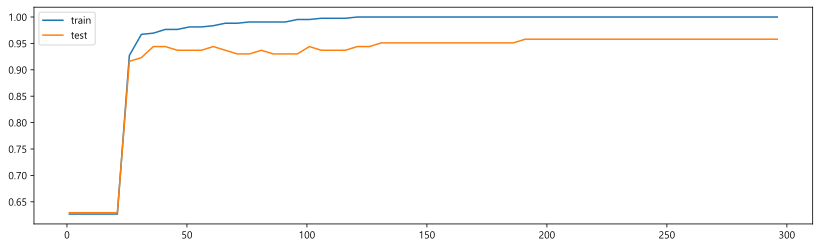

In [69]:
fig, ax = plt.subplots(1, 1, figsize=(14, 4))
ax.plot(i_s, train_scores, label='train')
ax.plot(i_s, test_scores, label='test')
plt.legend()
plt.show()

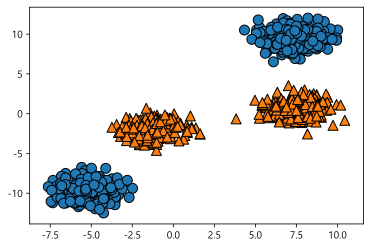

In [91]:
X, y = make_blobs(n_samples=1000, centers=4, random_state=8)
y = y % 2
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

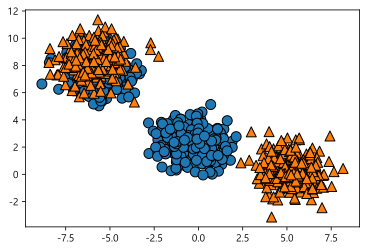

In [83]:
X, y = make_blobs(n_samples=1000, centers=4, random_state=5)
y = y % 2
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

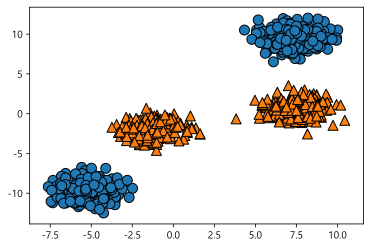

In [103]:
svc = SVC(max_iter=100000, C=10, gamma=0.01, kernel='rbf').fit(X, y)
y_pred = svc.predict(X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y_pred)

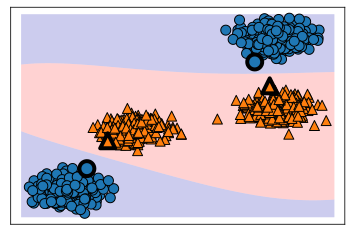

In [104]:
mglearn.plots.plot_2d_separator(svc, X, eps=0.5, fill=True, alpha=0.2)
sv = svc.support_vectors_
sv_labels = svc.dual_coef_.ravel() > 0
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=4)

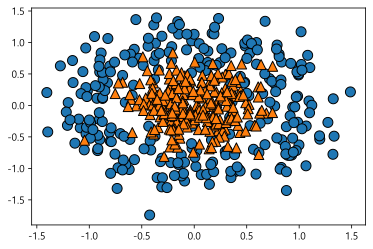

In [110]:
X, y = make_circles(n_samples=500, noise=0.25, factor=0.3, random_state=1)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [112]:
y_named = np.array(['blue', 'red'])[y]
y_named

array(['red', 'red', 'blue', 'blue', 'red', 'red', 'red', 'blue', 'blue',
       'blue', 'red', 'blue', 'blue', 'blue', 'red', 'blue', 'red', 'red',
       'blue', 'blue', 'red', 'red', 'red', 'red', 'blue', 'red', 'blue',
       'red', 'blue', 'blue', 'blue', 'red', 'blue', 'red', 'red', 'blue',
       'red', 'blue', 'red', 'red', 'red', 'red', 'red', 'blue', 'red',
       'red', 'red', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'red',
       'red', 'blue', 'red', 'red', 'blue', 'red', 'red', 'blue', 'red',
       'red', 'red', 'red', 'red', 'red', 'red', 'blue', 'red', 'red',
       'blue', 'blue', 'blue', 'red', 'red', 'red', 'red', 'blue', 'red',
       'blue', 'blue', 'red', 'blue', 'blue', 'red', 'red', 'red', 'red',
       'red', 'red', 'red', 'blue', 'red', 'blue', 'blue', 'blue', 'blue',
       'blue', 'blue', 'red', 'red', 'blue', 'red', 'blue', 'red', 'blue',
       'blue', 'blue', 'red', 'red', 'red', 'red', 'red', 'blue', 'red',
       'blue', 'blue', 'red', 'red', 'blu

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

In [116]:
gb = GradientBoostingClassifier(n_estimators=300, max_depth=3, random_state=0).fit(X_train, y_train)
gb.predict_proba(X_test).round(2), gb.decision_function(X_test).round(2)

(array([[0.05, 0.95],
        [1.  , 0.  ],
        [0.  , 1.  ],
        [1.  , 0.  ],
        [0.01, 0.99],
        [0.02, 0.98],
        [0.  , 1.  ],
        [0.81, 0.19],
        [0.78, 0.22],
        [0.  , 1.  ],
        [0.08, 0.92],
        [0.03, 0.97],
        [0.96, 0.04],
        [0.98, 0.02],
        [0.16, 0.84],
        [0.14, 0.86],
        [0.41, 0.59],
        [0.98, 0.02],
        [1.  , 0.  ],
        [0.15, 0.85],
        [0.01, 0.99],
        [0.  , 1.  ],
        [0.02, 0.98],
        [1.  , 0.  ],
        [0.92, 0.08],
        [0.97, 0.03],
        [0.18, 0.82],
        [0.01, 0.99],
        [0.05, 0.95],
        [0.98, 0.02],
        [1.  , 0.  ],
        [0.99, 0.01],
        [0.  , 1.  ],
        [0.99, 0.01],
        [0.08, 0.92],
        [1.  , 0.  ],
        [0.04, 0.96],
        [0.99, 0.01],
        [0.  , 1.  ],
        [0.99, 0.01],
        [0.57, 0.43],
        [0.99, 0.01],
        [0.  , 1.  ],
        [0.  , 1.  ],
        [0.04, 0.96],
        [0

In [128]:
gb_proba = gb.predict_proba(X_test).round(2)
(gb_proba[:, 0] <= 0.5).astype('int'), gb.predict(X_test)

(array([1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
        1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
        1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
        0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1]),
 array([1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
        1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
        1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
        0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1], dtype=int64))

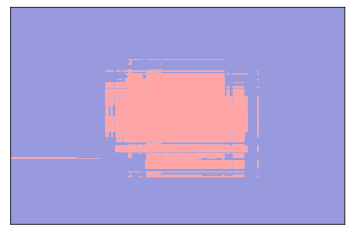

In [129]:
mglearn.plots.plot_2d_separator(gb, X_test, alpha=0.4, fill=True)

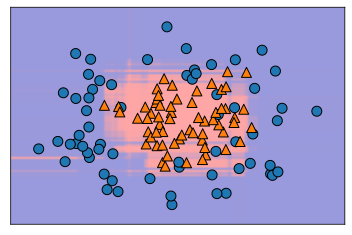

In [133]:
mglearn.tools.plot_2d_scores(gb, X_test, alpha=0.4, cm=mglearn.ReBl, function='predict_proba')
mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test)

In [135]:
np.argmax(gb_proba, axis=1)

array([1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1], dtype=int64)

In [136]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'], stratify=iris['target'], random_state=0)

In [137]:
gb = GradientBoostingClassifier(n_estimators=300, max_depth=3, random_state=0).fit(X_train, y_train)
gb.score(X_test, y_test)

0.9736842105263158

In [143]:
gb_proba = gb.predict_proba(X_test).round(2)
gb_proba

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [142]:
np.argmax(gb_proba, axis=1)

array([0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 2, 2, 1, 2, 1, 0, 0, 2, 0, 1, 2, 1,
       1, 0, 2, 0, 0, 1, 2, 1, 0, 1, 2, 2, 0, 1, 2, 2], dtype=int64)

In [145]:
iris['target_names'][gb.predict(X_test)]

array(['setosa', 'setosa', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'virginica',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'setosa',
       'setosa', 'virginica', 'setosa', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'setosa', 'virginica', 'setosa',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'setosa',
       'versicolor', 'virginica', 'virginica', 'setosa', 'versicolor',
       'virginica', 'virginica'], dtype='<U10')